In [59]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_style("darkgrid")
from sklearn import linear_model
import random
import math
import os

import warnings
warnings.filterwarnings('ignore')


Decripcion de los datos
             year        temp
count   133.00000  133.000000
mean   1946.00000    8.528271
std      38.53786    0.629293
min    1880.00000    6.920000
25%    1913.00000    8.100000
50%    1946.00000    8.430000
75%    1979.00000    8.890000
max    2012.00000   10.410000

Las primeras 8 filas de los datdos
   year  temp
0  1880  7.79
1  1881  8.19
2  1882  8.49
3  1883  7.94
4  1884  7.60
5  1885  8.16
6  1886  7.67
7  1887  8.23


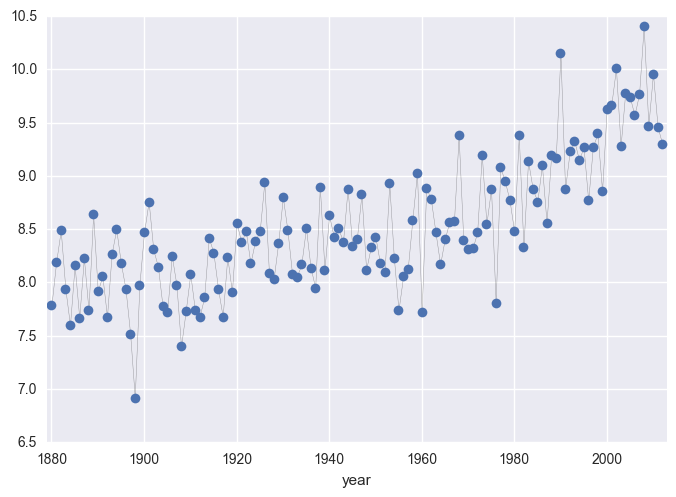

In [2]:
# Levanto los datos
df = pd.read_csv('./data/worldTemperature.csv', ' ', header = None, names = (['year', 'temp']))
print("Decripcion de los datos")
print(df.describe())

print("\nLas primeras 8 filas de los datdos")
print(df.head(8))

# Graficos los datos
ax = sns.tsplot(time=df['year'], data=df['temp'], interpolate=False)
sns.plt.show()

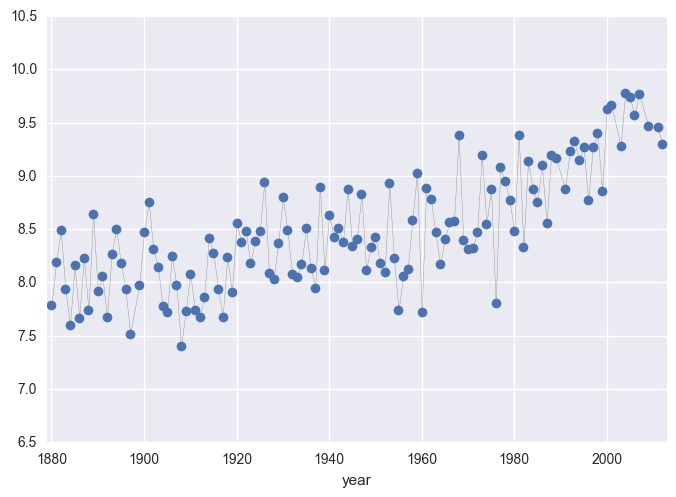

In [3]:
# Limpio los outliers
def mascara_outliers(s):
    return abs(s - s.mean()) <= 2*s.std()
    
mascara = mascara_outliers(df['temp'])
df = df[mascara]
sns.tsplot(time=df['year'], data=df['temp'], interpolate=False)

# Para que se evidencien mejor los outliers que saque, grafico en el mismo rango
# Algunos me parecen que no deberian ser removidos
sns.plt.ylim((6.5, 10.5))
sns.plt.show()

In [7]:
# Uso cuadrados minimos para predecir
sns.tsplot(time=df['year'], data=df['temp'], interpolate=False)

def armar_matriz_A(s):
    temp = []
    for t in s:
        temp.append([20*np.cos(5*t),1000*np.cos(60*t),10*np.sin(50*t),t, 1])
    return np.array(temp)

def entrenar_y_predecir_en_rangos(df, rango_entrenamiento, rango_prediccion):
    regr = linear_model.LinearRegression(fit_intercept=False)
    ECM = []
    # Entreno el modelo
    df_e = df[df['year'].isin(rango_entrenamiento)]
    A_e = armar_matriz_A(df_e['year'])
    regr.fit(A_e, df_e['temp'])

    # Me fijo la aproximacion que se realizo
    df_e['p'] = regr.predict(A_e)
    sns.tsplot(time=df_e['year'], data=df_e['p'], color='r')
    
    ECM.append(sum((df_e['p']-df_e['temp'])**2)/len(rango_prediccion))
    # Realizo predicciones
    df_p = df[df['year'].isin(rango_prediccion)]

    A_p = armar_matriz_A(df_p['year'])
    df_p['p'] = regr.predict(A_p)
    sns.tsplot(time=df_p['year'], data=df_p['p'], color='g')

    ECM.append(sum((df_p['p']-df_p['temp'])**2)/len(rango_prediccion))
    return ECM

def entrenar_y_pronosticar(df, rango_entrenamiento, rango_prediccion):
    regr = linear_model.LinearRegression(fit_intercept=False)
    ECM = []
    # Entreno el modelo
    df_e = df[df['year'].isin(rango_entrenamiento)]
    A_e = armar_matriz_A(df_e['year'])
    regr.fit(A_e, df_e['temp'])

    # Me fijo la aproximacion que se realizo
    df_e['p'] = regr.predict(A_e)
    sns.tsplot(time=df_e['year'], data=df_e['p'], color='r')
    
    # Realizo predicciones

    A_p = armar_matriz_A(rango_prediccion)
    df_p = regr.predict(A_p)
    sns.tsplot(time=rango_prediccion, data=df_p, color='g')

    return 

def predecir(k):
    return entrenar_y_predecir_en_rangos(df, range(k-35,k), range(k,k+10))

def pronosticar(k):
    return entrenar_y_pronosticar(df, range(k-35,k), range(k,k+10))



[0.30244064973738816, 0.075510665521649381]
[0.24042748017946908, 0.15444984528848105]
[0.26124537470809639, 0.07755939689120403]
[0.21156732808132017, 0.1863276347649141]
[0.24552826719049756, 0.19621921112165039]
[0.37623139958637397, 0.12695400369981066]
[0.38144382161611123, 0.21496805810408709]
[0.39443885489899905, 0.03514131195182469]
[0.29752776252604041, 0.13413290319531473]
Error promedio de entrenamiento:0.301
Error promedio de prediccion:0.133


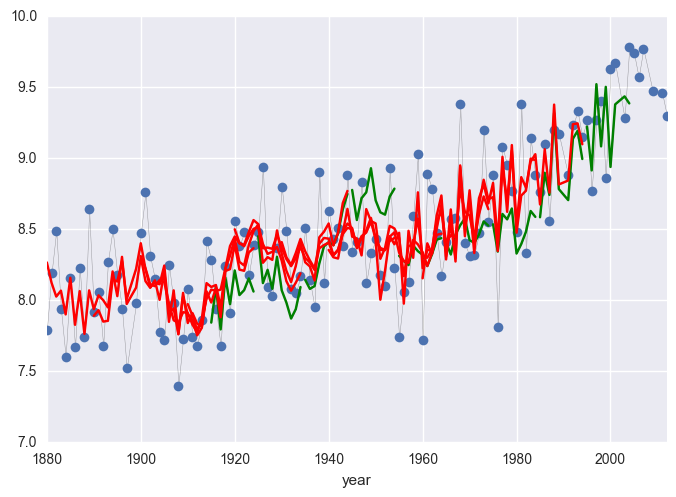

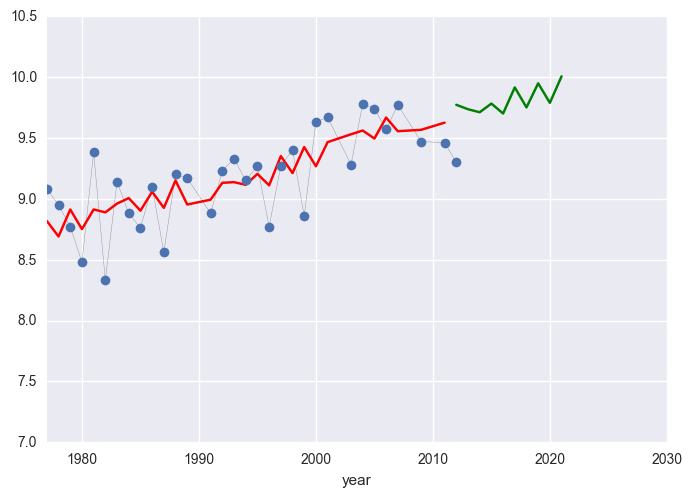

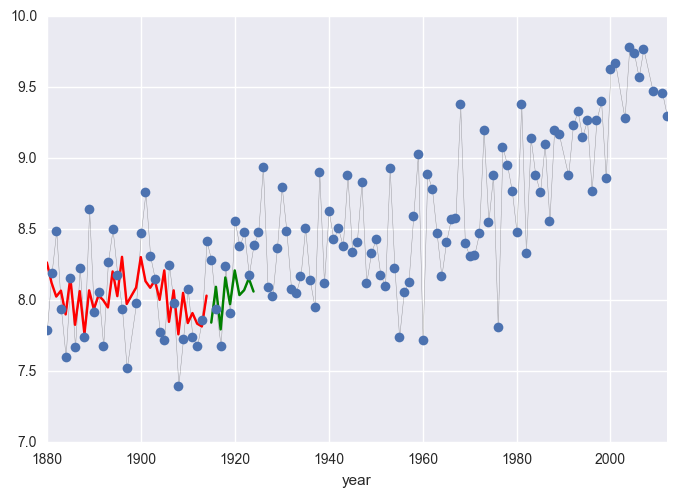

In [8]:
#Varios casos de entrenamiento
er_train = []
er_pred = []

for year in range(1915,2005,10):
    ECM = predecir(year)
    print(ECM)
    er_train.append(ECM[0])
    er_pred.append(ECM[1])


print("Error promedio de entrenamiento:{:.3f}".format(np.array(er_train).mean()))
print("Error promedio de prediccion:{:.3f}".format(np.array(er_pred).mean()))
sns.plt.xlim((1880, 2012))
sns.plt.show()


#Grafico pronostico a futuro
pronosticar(2012)
sns.tsplot(time=df['year'], data=df['temp'], interpolate=False)
sns.plt.xlim((2012-35, 2030))
sns.plt.show()

#Elegir uno de los graficos en algun intervalo y mostrarlo en el informe, por ejemplo:
predecir(1915)
sns.tsplot(time=df['year'], data=df['temp'], interpolate=False)
sns.plt.xlim((1880, 2012))
sns.plt.show()






In [17]:
#Experimento 2:

In [9]:
#Funciones de entrenamiento y creación de la matriz adaptadas a experimentos multivariados

#S es una matriz. Cada fila contiene X_i grande(un vector de temperaturas por pais para un año determinado)
def armar_matriz_A_multivar(s):
    temp = []
    for t in s:
        #Aca va la familia de funciones, cambiar segun expermiento. 
        #Sin la constante 
        temp.append([t.mean(), 1])
    return np.array(temp)

        

def entrenar_y_predecir_en_rangos(df, rango_entrenamiento, rango_prediccion, paises):
    regr = linear_model.LinearRegression(fit_intercept=False)
    ECM = []
    # Entreno el modelo
    df_e = df[df['year'].isin(rango_entrenamiento)]
    df_aux = df_e.ix[:,2:paises + 2]
    
    A_e = armar_matriz_A_multivar(df_aux.values)
    regr.fit(A_e, df_e['world'])

    # Me fijo la aproximacion que se realizo
    df_e['p'] = regr.predict(A_e)
    sns.tsplot(time=df_e['year'], data=df_e['p'], color='r')
    
    ECM.append(sum((df_e['p']-df_e['world'])**2)/len(rango_prediccion))
    
    # Realizo predicciones
    df_p = df[df['year'].isin(rango_prediccion)]
    df_aux = df_p.ix[:,2:paises + 2]
    A_p = armar_matriz_A_multivar(df_aux.values)
    df_p['p'] = regr.predict(A_p)
    sns.tsplot(time=df_p['year'], data=df_p['p'], color='g')

    ECM.append(sum((df_p['p']-df_p['world'])**2)/len(rango_prediccion))
    return ECM

def predecir(k, paises):
    return entrenar_y_predecir_en_rangos(df, range(k-35,k), range(k,k+10), paises)

[0.26377957461665125, 0.10270316831599482]
[0.27322234256465872, 0.11974046232840611]
[0.29660213331212715, 0.13535305129099878]
[0.30231041998112118, 0.15102810746533216]
[0.38213445621167613, 0.19924291598706881]
[0.45133986282208555, 0.20385087345318076]
[0.53307825894075234, 0.080932459590941169]
[0.29715941623519426, 0.080572029447249643]
Error promedio de entrenamiento: 0.350
Error promedio de prediccion: 0.134


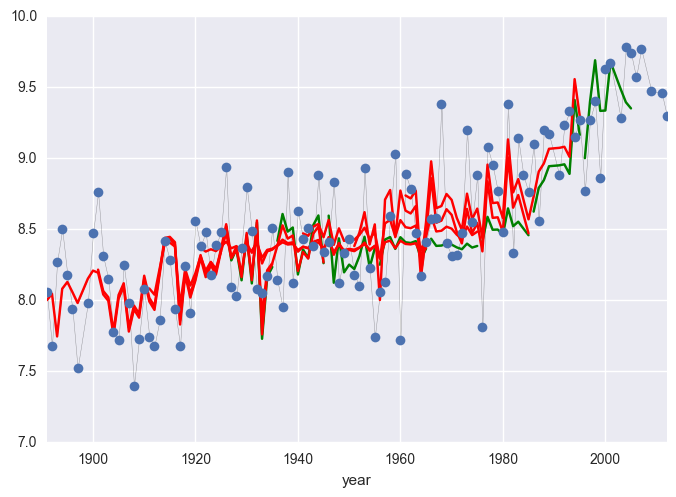

In [10]:
#Experimento 2.0
#Elegir representantes caracteristicos de cada clima (porque dicho clima representa la mayor parte del pais)
#Ademas el pais intenta ser lo mas grande posible dentro del clima elegido. 

# Levanto los datos de cada pais, las mediciones son por mes
# Como los años que no aparecen son los mismos para todos, yo tomaría a partir de 1891, que están todos
# Canada:

df_countries = pd.read_csv('./data/paises/Canada.csv',' ',header = None, names = ['year', 'Canada'])
df_countries['year'] = df_countries['year'].map(lambda x: int(math.modf(x)[1]))

# (Notar que este bucle vuelve a levantar Canada.csv)
# Repito para el resto
for filename in os.listdir('./data/paises/'):
    if os.path.isfile('./data/paises/' + filename) and filename != 'Canada.csv':
        aux = pd.read_csv('./data/paises/'+filename,' ',header = None, names = ['year', 'temp'])
        aux['year'] = aux['year'].map(lambda x: int(math.modf(x)[1]))
        filename = filename[:len(filename) - 5]
        df_countries[filename] = aux.temp

# Calculo el promedio anual de cada país
df = df_countries.groupby('year').mean().reset_index()

# Como los datos son consecutivos desde 1891, me quedo con ese subconjunto
df = (df[df['year'].isin(range(1891,2013))]).reset_index()

# Agrego la temperatura del planeta
df_world = pd.read_csv('./data/worldTemperature.csv', ' ', header = None, names = ['x', 'y'])
df_world = (df_world[df_world['x'].isin(range(1891,2013))]).reset_index()
df['world'] = df_world.y
mascara = mascara_outliers(df['world'])
df = df[mascara]

#Ahora aplico CM y grafico:
# Segundo parámetro: cant. de países en el dataframe

#Varios casos de entrenamiento
er_train = []
er_pred = []

for year in range(1926,2001,10):
    ECM = predecir(year,10)
    print(ECM)
    er_train.append(ECM[0])
    er_pred.append(ECM[1])


print("Error promedio de entrenamiento: {:.3f}".format(np.array(er_train).mean()))
print("Error promedio de prediccion: {:.3f}".format(np.array(er_pred).mean()))
sns.tsplot(time=df['year'], data=df['world'], interpolate=False)
sns.plt.xlim((1891, 2012))
sns.plt.show()

#Elegir dos intervalos (mejor/peor?) y plotear para mostrar en el informe

#Fin expermiento 2.0

Colombia.csv
Egypt.csv
Germany.csv
Greenland.csv
Italy.csv
Mongolia.csv
Paraguay.csv
Ukraine.csv
Zambia.csv
[0.1806384150377939, 0.10928548832599219]
[0.21890140094973609, 0.086035569410383234]
[0.22012937044268616, 0.13285966775236047]
[0.2838779048514003, 0.14961303359338723]
[0.34944837015489083, 0.18364652252146069]
[0.42518168719464483, 0.18547166296545436]
[0.40348763664363291, 0.088541182958625481]
[0.26696004716818073, 0.10210762676493265]
Error promedio de entrenamiento: 0.294
Error promedio de prediccion: 0.130


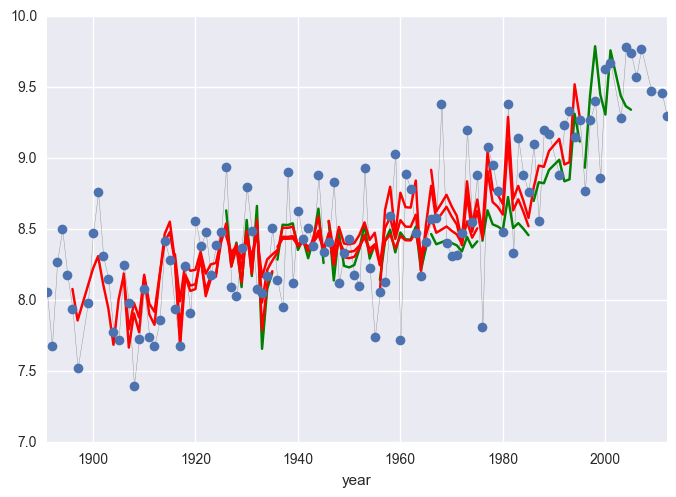

In [11]:
#Experimento 2.1


def armar_matriz_A_multivar_2(s,w):
    temp = []
    for t in s:
        temp.append([np.average(t, weights=w),1])
    return np.array(temp)


def entrenar_y_predecir_en_rangos(df, rango_entrenamiento, rango_prediccion, w, paises):
    regr = linear_model.LinearRegression(fit_intercept=False)
    ECM = []
    # Entreno el modelo
    df_e = df[df['year'].isin(rango_entrenamiento)]
    df_aux = df_e.ix[:,2:paises + 2]
    
    A_e = armar_matriz_A_multivar_2(df_aux.values,w)
    regr.fit(A_e, df_e['world'])

    # Me fijo la aproximacion que se realizo
    df_e['p'] = regr.predict(A_e)
    sns.tsplot(time=df_e['year'], data=df_e['p'], color='r')
    
    ECM.append(sum((df_e['p']-df_e['world'])**2)/len(rango_prediccion))
    
    # Realizo predicciones
    df_p = df[df['year'].isin(rango_prediccion)]
    df_aux = df_p.ix[:,2:paises + 2]
    A_p = armar_matriz_A_multivar_2(df_aux.values,w)
    df_p['p'] = regr.predict(A_p)
    sns.tsplot(time=df_p['year'], data=df_p['p'], color='g')

    ECM.append(sum((df_p['p']-df_p['world'])**2)/len(rango_prediccion))
    return ECM

def predecir(k, paises,w):
    return entrenar_y_predecir_en_rangos(df, range(k-30,k), range(k,k+10), w, paises)



#Utilizando promedio pesado segun importancia del clima
#Levanto los datos de cada pais, las mediciones son por mes
    
# Canada:
df_countries = pd.read_csv('./data/paises/Canada.csv',' ',header = None, names = ['year', 'Canada'])
df_countries['year'] = df_countries['year'].map(lambda x: int(math.modf(x)[1]))

# Repito para el resto
for filename in os.listdir('./data/paises/'):
    if os.path.isfile('./data/paises/' + filename) and filename != 'Canada.csv':
        print (filename)
        aux = pd.read_csv('./data/paises/'+filename,' ',header = None, names = ['year', 'temp'])
        aux['year'] = aux['year'].map(lambda x: int(math.modf(x)[1]))
        filename = filename[:len(filename) - 5]
        df_countries[filename] = aux.temp

# Calculo el promedio anual de cada país
df = df_countries.groupby('year').mean().reset_index()

# Como los datos son consecutivos desde 1891, me quedo con ese subconjunto
df = (df[df['year'].isin(range(1891,2013))]).reset_index()

# Agrego la temperatura del planeta
df_world = pd.read_csv('./data/worldTemperature.csv', ' ', header = None, names = ['x', 'y'])
df_world = (df_world[df_world['x'].isin(range(1891,2013))]).reset_index()
df['world'] = df_world.y
mascara = mascara_outliers(df['world'])
df = df[mascara]

#Ahora aplico CM y grafico:
# Segundo parámetro: cant. de países en el dataframe
#Tercer parametro w: pesos por paises

#Ahora aplico CM y grafico:
# Segundo parámetro: cant. de países en el dataframe

#Varios casos de entrenamiento
er_train = []
er_pred = []

w= [0.18,0.095,0.09,0.1,0.08,0.02,0.16,0.16,0.1,0.02]

for year in range(1926,2001,10):
    ECM = predecir(year,10,w)
    print(ECM)
    er_train.append(ECM[0])
    er_pred.append(ECM[1])


print("Error promedio de entrenamiento: {:.3f}".format(np.array(er_train).mean()))
print("Error promedio de prediccion: {:.3f}".format(np.array(er_pred).mean()))
sns.tsplot(time=df['year'], data=df['world'], interpolate=False)
sns.plt.xlim((1891, 2012))
sns.plt.show()

#Elegir dos intervalos (mejor/peor?) y plotear para mostrar en el informe

#Fin expermiento 2.1



In [31]:
#Experimento 2.2 (ejecutarlo sin compilar la celda anterior para que no tire error con la funcion predecir. Hacerlo con la IN[175])
#Elegir varios representantes de cada clima y promediarlos obteniendo la tempertaura promedio anual de un clima dado.
# Se divide en 3 regiones: Low Latitude, Mid Latitude, High Latitude; que a la vez se subdivide en tres grupos
# Se tienen hasta 9 representantes por cada grupo, hasta 3 por cada subgrupo
# Low Latitude comprende más region, si lo hacemos pesado, debería ser el que tiene más peso

# Inicializo un dataframe para cada region
df_lowLat = pd.read_csv('./data/paises/lowLat/Brazil.csv', ' ',header = None, names = ['year', 'Brazil'])
df_lowLat['year'] = df_lowLat['year'].map(lambda x: int(math.modf(x)[1]))

df_midLat = pd.read_csv('./data/paises/midLat/China.csv', ' ',header = None, names = ['year', 'China'])
df_midLat['year'] = df_midLat['year'].map(lambda x: int(math.modf(x)[1]))

df_highLat = pd.read_csv('./data/paises/highLat/Canada.csv', ' ',header = None, names = ['year', 'Canada'])
df_highLat['year'] = df_highLat['year'].map(lambda x: int(math.modf(x)[1]))

regions = ['lowLat', 'midLat', 'highLat']

for region in regions:
    for filename in os.listdir('./data/paises/' + region + '/'):
        if region == 'lowLat' and filename != 'Brazil.csv':
            aux = pd.read_csv('./data/paises/' + region + '/' + filename, ' ', header = None, names = ['year', 'temp'])
            aux['year'] = aux['year'].map(lambda x: int(math.modf(x)[1]))
            filename = filename[:len(filename) - 5]
            df_lowLat[filename] = aux.temp
        elif region == 'midLat' and filename != 'China.csv':
            aux = pd.read_csv('./data/paises/' + region + '/' + filename, ' ', header = None, names = ['year', 'temp'])
            aux['year'] = aux['year'].map(lambda x: int(math.modf(x)[1]))
            filename = filename[:len(filename) - 5]
            df_midLat[filename] = aux.temp
        elif region == 'highLat' and filename != 'Canada.csv':
            aux = pd.read_csv('./data/paises/' + region + '/' + filename, ' ', header = None, names = ['year', 'temp'])
            aux['year'] = aux['year'].map(lambda x: int(math.modf(x)[1]))
            filename = filename[:len(filename) - 5]
            df_highLat[filename] = aux.temp

# Calculo el promedio anual de los países de cada región
df_lowLat  = df_lowLat.groupby('year').mean()
df_midLat  = df_midLat.groupby('year').mean()
df_highLat = df_highLat.groupby('year').mean()

# Obtengo el promedio anual de cada region
df_lowLat['lowLat']   = df_lowLat.mean(axis = 1)
df_midLat['midLat']   = df_midLat.mean(axis = 1)
df_highLat['highLat'] = df_highLat.mean(axis = 1)

# Necesario para que los años sean una key, y así poder manipularlos mejor (para plotear, por ej)
df_lowLat   = df_lowLat.reset_index() 
df_midLat   = df_midLat.reset_index()
df_highLat  = df_highLat.reset_index()
# Acomodo los rangos
# En df voy a juntar todo
df         = (df_lowLat[df_lowLat['year'].isin(range(1891,2013))]).reset_index()
df_midLat  = (df_midLat[df_midLat['year'].isin(range(1891,2013))]).reset_index()
df_highLat = (df_highLat[df_highLat['year'].isin(range(1891,2013))]).reset_index()

# uno los dataframes
df['midLat']  = df_midLat.midLat
df['highLat'] = df_highLat.highLat

# Agrego la temperatura del planeta
df_world = pd.read_csv('./data/worldTemperature.csv', ' ', header = None, names = ['x', 'y'])
df_world = (df_world[df_world['x'].isin(range(1891,2013))]).reset_index()
df['world'] = df_world.y
mascara = mascara_outliers(df['world'])
df = df[mascara]
# Y me quedo con lo que me importa
# (Me guardo la columna index para que sea retrocompatible con el método predecir)
df = df[['index', 'year', 'lowLat', 'midLat', 'highLat', 'world']]

#Ahora aplico CM y grafico:
# Segundo parámetro: cant. de países en el dataframe


#Varios casos de entrenamiento
er_train = []
er_pred = []

for year in range(1921,2001,10):
    ECM = predecir(year,3)
    print(ECM)
    er_train.append(ECM[0])
    er_pred.append(ECM[1])


print("Error promedio de entrenamiento: {:.3f}".format(np.array(er_train).mean()))
print("Error promedio de prediccion: {:.3f}".format(np.array(er_pred).mean()))
sns.tsplot(time=df['year'], data=df['world'], interpolate=False)
sns.plt.xlim((1891, 2012))
sns.plt.show()

#Elegir dos intervalos (mejor/peor?) y plotear para mostrar en el informe

#Fin experimento 2.2


TypeError: predecir() missing 1 required positional argument: 'w'

In [24]:
#Experimento 3': Predecir la altura sobre el nivel del mar a partir de las temperaturas del planeta
#Esto no estaria funcionando como lo esperado. La idea era en funcion de la temperatura, pero termino siendo del año...
#No encontre funciones que utilicen solo la temperatura y den algo razonable :()



def entrenar_y_predecir_en_rangos(df, rango_entrenamiento, rango_prediccion):
    regr = linear_model.LinearRegression(fit_intercept=False)
    ECM = []
    # Entreno el modelo
    df_e = df[df['year'].isin(rango_entrenamiento)]
    df_aux = df_e.ix[:,0:2]
    A_e = armar_matriz_A(df_aux.values)
    regr.fit(A_e, df_e['gmsl'])

    # Me fijo la aproximacion que se realizo
    df_e['p'] = regr.predict(A_e)
    sns.tsplot(time=df_e['year'], data=df_e['p'], color='r')
    
    ECM.append(math.sqrt(sum((df_e['p']-df_e['gmsl'])**2)/len(rango_prediccion)))
    # Realizo predicciones
    df_p = df[df['year'].isin(rango_prediccion)]
    df_aux = df_p.ix[:,0:2]
    A_p = armar_matriz_A(df_aux.values)
    df_p['p'] = regr.predict(A_p)
    sns.tsplot(time=df_p['year'], data=df_p['p'], color='g')

    ECM.append(math.sqrt(sum((df_p['p']-df_p['gmsl'])**2)/len(rango_prediccion)))
    return ECM

def entrenar_y_pronosticar(df, rango_entrenamiento, rango_prediccion):
    regr = linear_model.LinearRegression(fit_intercept=False)
    ECM = []
    # Entreno el modelo
    df_e = df[df['year'].isin(rango_entrenamiento)]
    A_e = armar_matriz_A(df_e['world'])
    regr.fit(A_e, df_e['gmsl'])

    # Me fijo la aproximacion que se realizo
    df_e['p'] = regr.predict(A_e)
    sns.tsplot(time=df_e['year'], data=df_e['p'], color='r')
    
    # Realizo predicciones

    A_p = armar_matriz_A(rango_prediccion)
    df_p = regr.predict(A_p)
    sns.tsplot(time=rango_prediccion, data=df_p, color='g')

    return 

def predecir(k):
    return entrenar_y_predecir_en_rangos(df, range(k-40,k), range(k,k+30))

def pronosticar(k):
    return entrenar_y_pronosticar(df, range(k-35,k), range(k,k+10))


def armar_matriz_A(s):
    temp = []
    for t in s:
        temp.append([t[1]**2,t[0]**4,t[0]**2,1])
    return np.array(temp)


[6.575683565507821, 10.264143324397761]
[5.944846320729907, 7.42533280253515]
[6.499930002254766, 10.677471930109355]
[5.942593810644174, 18.557729891783158]
[5.374927589655826, 20.695282387475206]
[5.723562130827486, 16.869049254580663]
[6.293560061106641, 15.190133456940977]
[7.244112327476554, 9.269659325310153]
[5.628595416587653, 7.7559949582563945]
[4.959591068216275, 13.582625801890456]
[5.910868250594124, 6.9708432164181735]
[6.120777079379109, 5.652668578417669]
[5.922450831802385, 8.89610242997043]
Error promedio de entrenamiento: 6.011
Error promedio de prediccion: 11.677


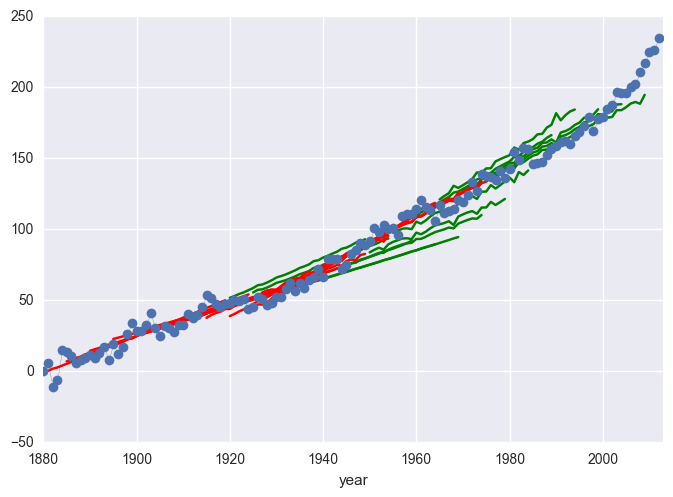

,year,temp,gmsl
0,1880,0.00,0.0
1,1881,0.40,5.6
2,1882,0.70,-11.2
3,1883,0.15,-5.9
4,1884,-0.19,15.0
5,1885,0.37,13.5
6,1886,-0.12,11.1
7,1887,0.44,5.5
8,1888,-0.05,7.6
9,1889,0.85,9.2


In [25]:
# Inicializo un dataframe con GMSL
df_gmsl = pd.read_csv('./data/CSIRO_Recons_gmsl_yr_2015.csv',header = None,names =['year', 'gmsl','unc'])
df_gmsl = df_gmsl[['year','gmsl']]
#Transformo los años a enteros,cambio la referencia a 1880 y los tomo en el rango adecuado
df_gmsl['year'] = df_gmsl['year'].map(lambda x: int(math.modf(x)[1]))
df_gmsl['gmsl'] = df_gmsl['gmsl'].map(lambda x: x+158.7)
df_gmsl = df_gmsl[df_gmsl['year'].isin(range(1880,2013))]

#Cargo el df del mundo
df = pd.read_csv('./data/worldTemperature.csv', ' ', header = None, names = (['year', 'temp']))

#Tomo las temperaturas relativas a 1880
df['temp'] = df['temp'].map(lambda x: x-7.79)
df['gmsl'] = df_gmsl['gmsl']


#Veo correlacion entre las variables
corr = df.corr(method='pearson', min_periods=1)
#print(corr)



#Varios casos de entrenamiento
er_train = []
er_pred = []

for year in range(1920,1985,5):
    ECM = predecir(year)
    print(ECM)
    er_train.append(ECM[0])
    er_pred.append(ECM[1])


print("Error promedio de entrenamiento: {:.3f}".format(np.array(er_train).mean()))
print("Error promedio de prediccion: {:.3f}".format(np.array(er_pred).mean()))
sns.tsplot(time=df_gmsl['year'], data=df_gmsl['gmsl'], interpolate=False)
sns.plt.xlim((1880, 2013))
sns.plt.show()
df



[0.21085033511717222, 0.052049472460666171]
[0.23018402682582617, 0.096359541341885777]
[0.24805420092858391, 0.27308386986039779]
[0.35329526834431663, 0.1597018648173994]
[0.32734991711531636, 0.10784624109296341]
[0.2970904147132844, 0.14732808813846981]
[0.34560183770764774, 0.1343967067372053]
[0.3228670861435694, 0.12728190108633608]
Error promedio de entrenamiento: 0.292
Error promedio de prediccion: 0.137


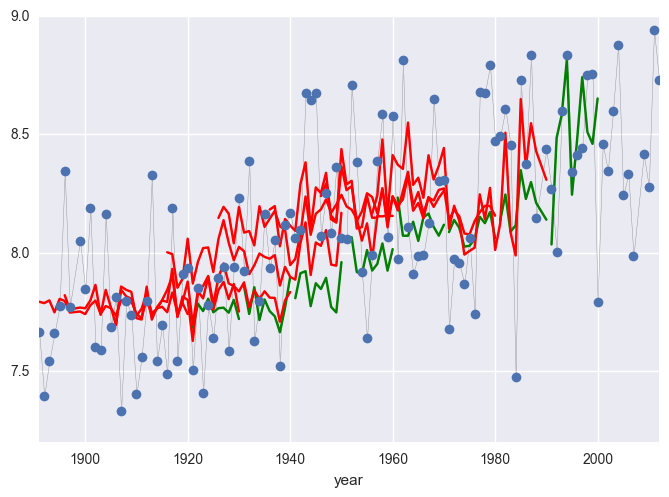

In [103]:
#Funciones de entrenamiento y creación de la matriz adaptadas a experimentos multivariados

#S es una matriz. Cada fila contiene X_i grande(un vector de temperaturas por pais para un año determinado)
def armar_matriz_A_multivar(s):
    temp = []
    for t in s:
        #Aca va la familia de funciones, cambiar segun expermiento. 
        #Sin la constante 
        temp.append([t.mean(),t[6]**2,1])
    return np.array(temp)

def entrenar_y_predecir_en_rangos(df, rango_entrenamiento, rango_prediccion, ciudades):
    regr = linear_model.LinearRegression(fit_intercept=False)
    ECM = []
    # Entreno el modelo
    df_e = df[df['year'].isin(rango_entrenamiento)]
    df_aux = df_e.ix[:, 1:ciudades + 1]
    
    A_e = armar_matriz_A_multivar(df_aux.values)
    regr.fit(A_e, df_e['Bariloche'])

    # Me fijo la aproximacion que se realizo
    df_e['p'] = regr.predict(A_e)
    sns.tsplot(time=df_e['year'], data=df_e['p'], color='r')
    
    ECM.append(sum((df_e['p']-df_e['Bariloche'])**2)/len(rango_prediccion))
    
    # Realizo predicciones
    df_p = df[df['year'].isin(rango_prediccion)]
    df_aux = df_p.ix[:, 1:ciudades + 1]
    A_p = armar_matriz_A_multivar(df_aux.values)
    df_p['p'] = regr.predict(A_p)
    sns.tsplot(time=df_p['year'], data=df_p['p'], color='g')

    ECM.append(sum((df_p['p']-df_p['Bariloche'])**2)/len(rango_prediccion))
    return ECM

def predecir(k, ciudades):
    return entrenar_y_predecir_en_rangos(df, range(k-35,k), range(k,k+10), ciudades)

#Experimento 4.0
#Elegir ciudades que estan en la misma altitud que bariloche pero en el hemisferio norte

# Levanto los datos de cada ciudad, las mediciones son por mes
# Como los años que no aparecen son los mismos para todos, yo tomaría a partir de 1891, que están todos

df_cities = pd.read_csv('./data/ciudadesPrueba/Bern.csv',' ',header = None, names = ['year', 'Bern'])
df_cities['year'] = df_cities['year'].map(lambda x: int(math.modf(x)[1]))
df_cities = (df_cities[df_cities['year'].isin(range(1891, 2013))]).reset_index(drop=True)

# Repito para el resto
for filename in os.listdir('./data/ciudadesPrueba/'):
    if os.path.isfile('./data/ciudadesPrueba/' + filename) and filename != 'Bern.csv':
        aux = pd.read_csv('./data/ciudadesPrueba/'+filename,' ',header = None, names = ['year', 'temp'])
        aux['year'] = aux['year'].map(lambda x: int(math.modf(x)[1]))
        aux = (aux[aux['year'].isin(range(1891, 2013))]).reset_index(drop=True)
        filename = filename[:len(filename) - 4]
        df_cities[filename] = aux.temp

# Agrego la temperatura de Bariloche
df_bariloche = pd.read_csv('./data/San_Carlos_De_Bariloche.csv', ' ', header = None, names = ['x', 'y'])
#df_bariloche = pd.read_csv('./data/Comodoro_Rivadavia.csv', ' ', header = None, names = ['x', 'y'])
df_bariloche['x'] = df_bariloche['x'].map(lambda x: int(math.modf(x)[1])) 
df_bariloche = (df_bariloche[df_bariloche['x'].isin(range(1891,2013))]).reset_index(drop=True)
df_cities['Bariloche'] = df_bariloche.y
# Calculo el promedio anual
df = df_cities.groupby('year').mean().reset_index()
# Remuevo outliers
mascara = mascara_outliers(df['Bariloche'])
df = df[mascara]

#Ahora aplico CM y grafico:

#Varios casos de entrenamiento
er_train = []
er_pred = []

for year in range(1921, 2001, 10):
    # Segundo parámetro: cant. de ciudades incluidas en el entrenamiento
    # No se incluye a la que se desea predecir (en este caso, Comodoro Rivadavia)
    ECM = predecir(year, 8)
    print(ECM)
    er_train.append(ECM[0])
    er_pred.append(ECM[1])

print("Error promedio de entrenamiento: {:.3f}".format(np.array(er_train).mean()))
print("Error promedio de prediccion: {:.3f}".format(np.array(er_pred).mean()))
sns.tsplot(time=df['year'], data=df['Bariloche'], interpolate=False)
sns.plt.xlim((1891, 2012))
sns.plt.show()


#Fin expermiento 4.0